In [1]:
import matplotlib.pyplot as plt
import pandas as pd

<font size='5'>DATA EXPLORATION</font>

In [2]:
df=pd.read_csv(r"C:\Users\dixit\Downloads\sales_data (1).csv")
df.head(10)

Date     Product  Quantity  Price Customer_ID Region  Total_Sales
0  2024-01-01       Phone         7  37300     CUST001   East       261100
1  2024-01-02  Headphones         4  15406     CUST002  North        61624
2  2024-01-03       Phone         2  21746     CUST003   West        43492
3  2024-01-04  Headphones         1  30895     CUST004   East        30895
4  2024-01-05      Laptop         8  39835     CUST005  North       318680
5  2024-01-06      Laptop         7  40420     CUST006  South       282940
6  2024-01-07      Laptop         9  40430     CUST007  South       363870
7  2024-01-08      Laptop         7   7262     CUST008   West        50834
8  2024-01-09      Tablet         3  32791     CUST009  North        98373
9  2024-01-10      Laptop         4  45023     CUST010   West       180092

In [3]:
print(df.describe())  # Stats: mean, min/max for numbers
print(df['Product'].value_counts())  # Top categories (replace 'category')
df.groupby('Product')['Price'].mean()  # Averages by group


         Quantity         Price    Total_Sales
count  100.000000    100.000000     100.000000
mean     4.780000  25808.510000  123650.480000
std      2.588163  13917.630242  100161.085275
min      1.000000   1308.000000    6540.000000
25%      2.750000  14965.250000   39517.500000
50%      5.000000  24192.000000   97955.500000
75%      7.000000  38682.250000  175792.500000
max      9.000000  49930.000000  373932.000000
Product
Tablet        26
Laptop        24
Phone         20
Headphones    15
Monitor       15
Name: count, dtype: int64


Product
Headphones    28692.133333
Laptop        27651.500000
Monitor       20709.666667
Phone         27379.000000
Tablet        24177.230769
Name: Price, dtype: float64

<font size='5'>Basic Analysis</font>

In [4]:
df.describe()

Quantity         Price    Total_Sales
count  100.000000    100.000000     100.000000
mean     4.780000  25808.510000  123650.480000
std      2.588163  13917.630242  100161.085275
min      1.000000   1308.000000    6540.000000
25%      2.750000  14965.250000   39517.500000
50%      5.000000  24192.000000   97955.500000
75%      7.000000  38682.250000  175792.500000
max      9.000000  49930.000000  373932.000000

In [5]:
#SUM OF THE TOTAL SALES
Sum_Totalsales=(df['Total_Sales'].sum())
print(f"SUM of the Total_Sales is {Sum_Totalsales}")

SUM of the Total_Sales is 12365048


In [6]:
#Mean
df.groupby('Quantity')['Price'].mean()

Quantity
1    26587.071429
2    25794.181818
3    25744.333333
4    25873.600000
5    21591.100000
6    27161.727273
7    26110.100000
8    25982.727273
9    27054.666667
Name: Price, dtype: float64

<font size='5'>Find Patterns</font>


In [7]:

# ✅ PATTERN 1: Top Products by Number of Sales
print(" Pattern 1: Top Products (by sales count)")
print(df['Product'].value_counts())


# ✅ PATTERN 2: Total Revenue by Product ($$ money maker)
print("\n🟢 Pattern 2: Total Revenue by Product")
revenue_by_prod = df.groupby('Product')['Price'].sum().sort_values(ascending=False)
print(revenue_by_prod)


# ✅ PATTERN 3: Average Price by Product (most expensive?)
print("\n🟢 Pattern 3: Average Price by Product")
avg_price_by_prod = df.groupby('Product')['Price'].mean().round(2).sort_values(ascending=False)
print(avg_price_by_prod)


# ✅ PATTERN 4: Correlation (do higher prices mean more/less quantity?)
print("\n🟢 Pattern 4: Price vs Quantity Correlation")
corr_price_qty = df['Price'].corr(df['Quantity'])
print(f"Correlation: {corr_price_qty:.3f} (near 0 = no relationship)")

# ✅ PATTERN 5: Product Distribution by Region (heatmap potential)
print("\n🟢 Pattern 5: Product Sales by Region")
region_dist = pd.crosstab(df['Product'], df['Region'])
print(region_dist)


 Pattern 1: Top Products (by sales count)
Product
Tablet        26
Laptop        24
Phone         20
Headphones    15
Monitor       15
Name: count, dtype: int64

🟢 Pattern 2: Total Revenue by Product
Product
Laptop        663636
Tablet        628608
Phone         547580
Headphones    430382
Monitor       310645
Name: Price, dtype: int64

🟢 Pattern 3: Average Price by Product
Product
Headphones    28692.13
Laptop        27651.50
Phone         27379.00
Tablet        24177.23
Monitor       20709.67
Name: Price, dtype: float64

🟢 Pattern 4: Price vs Quantity Correlation
Correlation: 0.008 (near 0 = no relationship)

🟢 Pattern 5: Product Sales by Region
Region      East  North  South  West
Product                             
Headphones     4      2      4     5
Laptop         2      9      9     4
Monitor        5      4      1     5
Phone          3      3      8     6
Tablet         5     10      5     6


<font size='5'>Charts</font>

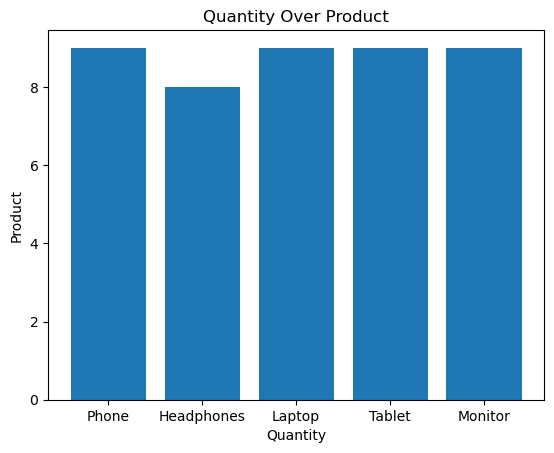

In [14]:
'''BAR CHART PLOTTING'''

y=df['Product']
x=df['Quantity']
plt.bar(y,x)
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.title("Quantity Over Product")
plt.show()

In [15]:
df=pd.read_csv(r"C:\Users\dixit\Downloads\sales_data (1).csv")
df.head()

Date     Product  Quantity  Price Customer_ID Region  Total_Sales
0  2024-01-01       Phone         7  37300     CUST001   East       261100
1  2024-01-02  Headphones         4  15406     CUST002  North        61624
2  2024-01-03       Phone         2  21746     CUST003   West        43492
3  2024-01-04  Headphones         1  30895     CUST004   East        30895
4  2024-01-05      Laptop         8  39835     CUST005  North       318680

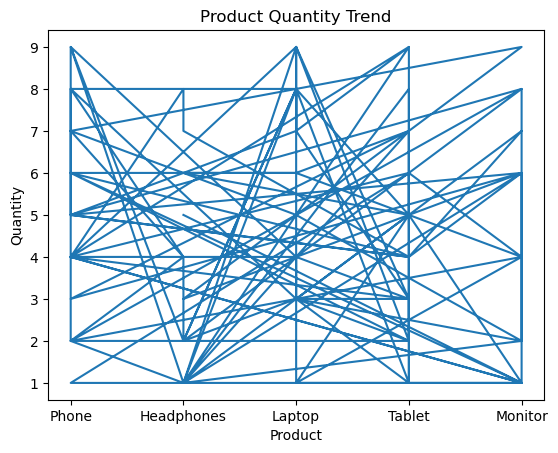

In [22]:


'''Line CHART PLOTTING'''


x = df['Product']           # Categories (100 items)
y = df['Quantity']          # Values (must also be 100 items, NOT string!)

plt.plot(x, y)              # Now lengths match
plt.xlabel('Product')
plt.ylabel('Quantity')      # Fixed: plt.ylabel(), not plt.y.label()
plt.title('Product Quantity Trend')

plt.show()


In [1]:
'''PIE CHART PLOTTING'''
y=df["Total_Sales"]
plt.pie(y)
plt.title("Product Division")
plt.show()

NameError: name 'df' is not defined